Assignment-3


Assignment:
    
AI Travel Agent & Expense Planner(Purpose: Trip planning for any city worldwide with Realtime data.")

• Real-time weather information
• Top attractions and activities
• Hotel cost calculation (per day × total days)
• Currency conversion to user's native currency
• Complete itinerary generation
• Total expense calculation
• generate a summary of the entire output

user_input
  |
search attraction and activity
1. search attracation
2. search restaurant
3. search activity
4. search transportation
  |
search weather forcasting
1. get current weather
2. get weather forcast
  |
search hotel costs
1. search hotel
2. estimate the hotel cost
3. budget_range
  |
calculate total cost
1. add
2. multiply
3. calculated total cost
4. calcualte the daily budget
    | 
currency_converion
1. get exchnage rate
2. convert currancy
    | 
Itinery generation
1. get day plan
2. crete full itinery
    |
create Trip Summary
    |
Retun complete traval plan

Note: if you know the OOPS then design this entire system using object and class in modular fashion.





 everyone you can submit the assignments in this form. MAke sure to have one GitHub link and put all the assignments there https://forms.gle/g8RZ4qx8yvNcih4B7    
    

In [5]:
from dotenv import load_dotenv
load_dotenv()
import os
os.environ['GROQ_API_KEY'] = os.getenv("GROQ_API_KEY")

In [6]:
model="deepseek-r1-distill-llama-70b"

In [11]:
from langchain_groq import ChatGroq

llm=ChatGroq(model_name=model)
def generate_response(prompt):
    response = llm.invoke(prompt)
    return response

if __name__ == "__main__":
    prompt = "What is the capital of France?"
    response = generate_response(prompt)
    print(f"Prompt: {prompt}")
    print(f"Response: {response.content}")

    


Prompt: What is the capital of France?
Response: <think>

</think>

The capital of France is Paris.


In [17]:
from langgraph.graph import StateGraph, END
#from langgraph.checkpoint import MemorySaver
from typing import TypedDict, List

# Step 1: Define the State
class TravelState(TypedDict):
    city: str
    days: int
    user_currency: str
    weather_info: str
    attractions: List[str]
    restaurants: List[str]
    activities: List[str]
    transportation: List[str]
    hotel_cost_per_day: float
    total_hotel_cost: float
    exchange_rate: float
    itinerary: List[dict]
    total_expense: float
    summary: str

# Step 2: Define Node Functions
def get_weather(state: TravelState) -> TravelState:
    state["weather_info"] = f"Sunny, 25°C in {state['city']}"  # Placeholder or real API
    return state

def search_attractions(state: TravelState) -> TravelState:
    state["attractions"] = ["Central Park", "Museum of Art", "Historic Old Town"]
    return state

def search_restaurants(state: TravelState) -> TravelState:
    state["restaurants"] = ["The Fancy Spoon", "City Diner", "Pizza Palace"]
    return state

def search_activities(state: TravelState) -> TravelState:
    state["activities"] = ["City Walking Tour", "Boat Ride", "Cooking Class"]
    return state

def search_transportation(state: TravelState) -> TravelState:
    state["transportation"] = ["Metro", "Taxi", "Bike Rental"]
    return state

def estimate_hotel(state: TravelState) -> TravelState:
    cost_per_day = 100  # Placeholder
    state["hotel_cost_per_day"] = cost_per_day
    state["total_hotel_cost"] = cost_per_day * state["days"]
    return state

def calculate_expense(state: TravelState) -> TravelState:
    daily_budget = 75
    state["total_expense"] = (daily_budget * state["days"]) + state["total_hotel_cost"]
    return state

def generate_itinerary(state: TravelState) -> TravelState:
    itinerary = []
    for i in range(state["days"]):
        day_plan = {
            "day": i + 1,
            "plan": f"Visit {state['attractions'][i % len(state['attractions'])]}, "
                    f"eat at {state['restaurants'][i % len(state['restaurants'])]}, "
                    f"do {state['activities'][i % len(state['activities'])]}"
        }
        itinerary.append(day_plan)
    state["itinerary"] = itinerary
    return state

def generate_summary(state: TravelState) -> TravelState:
    summary = (
        f"Trip to {state['city']} for {state['days']} days.\n"
        f"Weather: {state['weather_info']}\n"
        f"Top Attractions: {', '.join(state['attractions'])}\n"
        f"Restaurants: {', '.join(state['restaurants'])}\n"
        f"Activities: {', '.join(state['activities'])}\n"
        f"Hotel Cost: {state['total_hotel_cost']} ({state['user_currency']})\n"
        f"Total Expense: {state['total_expense']} ({state['user_currency']})\n"
        f"Itinerary: {state['itinerary']}\n"
    )
    state["summary"] = summary
    return state


In [18]:
# Step 3: Build LangGraph Flow
builder = StateGraph(TravelState)

# Register each node
builder.add_node("get_weather", get_weather)
builder.add_node("search_attractions", search_attractions)
builder.add_node("search_restaurants", search_restaurants)
builder.add_node("search_activities", search_activities)
builder.add_node("search_transportation", search_transportation)
builder.add_node("estimate_hotel", estimate_hotel)
builder.add_node("calculate_expense", calculate_expense)
builder.add_node("generate_itinerary", generate_itinerary)
builder.add_node("generate_summary", generate_summary)

# Set up edges
builder.set_entry_point("get_weather")
builder.add_edge("get_weather", "search_attractions")
builder.add_edge("search_attractions", "search_restaurants")
builder.add_edge("search_restaurants", "search_activities")
builder.add_edge("search_activities", "search_transportation")
builder.add_edge("search_transportation", "estimate_hotel")
builder.add_edge("estimate_hotel", "calculate_expense")
builder.add_edge("calculate_expense", "generate_itinerary")
builder.add_edge("generate_itinerary", "generate_summary")
builder.add_edge("generate_summary", END)

# Compile the graph
graph = builder.compile()


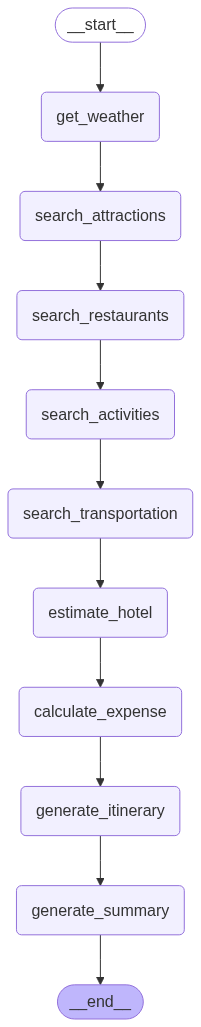

In [20]:
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [21]:
# Sample state input
input_state = {
    "city": "Paris",
    "days": 3,
    "user_currency": "EUR",
    "weather_info": "",
    "attractions": [],
    "restaurants": [],
    "activities": [],
    "transportation": [],
    "hotel_cost_per_day": 0,
    "total_hotel_cost": 0,
    "exchange_rate": 1.0,
    "itinerary": [],
    "total_expense": 0,
    "summary": ""
}

# Run the graph
final_state = graph.invoke(input_state)

print(final_state["summary"])


Trip to Paris for 3 days.
Weather: Sunny, 25°C in Paris
Top Attractions: Central Park, Museum of Art, Historic Old Town
Restaurants: The Fancy Spoon, City Diner, Pizza Palace
Activities: City Walking Tour, Boat Ride, Cooking Class
Hotel Cost: 300 (EUR)
Total Expense: 525 (EUR)
Itinerary: [{'day': 1, 'plan': 'Visit Central Park, eat at The Fancy Spoon, do City Walking Tour'}, {'day': 2, 'plan': 'Visit Museum of Art, eat at City Diner, do Boat Ride'}, {'day': 3, 'plan': 'Visit Historic Old Town, eat at Pizza Palace, do Cooking Class'}]

